# Bend Morphologies to stay inside Mesh

This jupyter notebook explains how to setup a network where the axons and dendrites bend to stay within the mesh boundaries.

In [1]:
import os
from snudda.place import create_cube_mesh

network_path = os.path.join("networks", "bending_example")
mesh_file = os.path.join(network_path, "mesh", "cube_volume.obj")

create_cube_mesh(mesh_file, [500e-6,500e-6, 500e-6], 900e-6, "Cube for bending example")

In [2]:
from snudda import SnuddaInit

si = SnuddaInit(network_path=network_path, random_seed=123)

si.define_structure(struct_name="Striatum", struct_mesh=mesh_file, d_min=15e-6, mesh_bin_width=50e-6)

neuron_dir = os.path.join("$DATA","neurons","striatum","dspn")  # Use this instead for real morphologies

# stay_inside=True means the axons and dendrites should be inside volume
si.add_neurons(name="dSPN", num_neurons=20, volume_id="Striatum",
               neuron_dir=neuron_dir, stay_inside=True)

si.write_json()

Adding neurons: dSPN from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/dspn
Writing networks/bending_example/network-config.json


In [3]:
from snudda import SnuddaPlace
sp = SnuddaPlace(network_path=network_path, verbose=False)
sp.place()

Reading SNUDDA_DATA=None from networks/bending_example/network-config.json
Generating 238329 points for networks/bending_example/mesh/cube_volume.obj
n_points = 226626, previous close_pairs = 490050
n_points = 215522, previous close_pairs = 404107
n_points = 204999, previous close_pairs = 336168
n_points = 195043, previous close_pairs = 281235
n_points = 185647, previous close_pairs = 235442
n_points = 176804, previous close_pairs = 198563
n_points = 168516, previous close_pairs = 165814
n_points = 160792, previous close_pairs = 139833
n_points = 153624, previous close_pairs = 118001
n_points = 147032, previous close_pairs = 98084
n_points = 141019, previous close_pairs = 82062
n_points = 135551, previous close_pairs = 70538
n_points = 130611, previous close_pairs = 60126
n_points = 126182, previous close_pairs = 50831
n_points = 122262, previous close_pairs = 42573
n_points = 120153, previous close_pairs = 35321
n_points = 88855, previous close_pairs = 31298
Filtering 88855 points..
F

Reading SNUDDA_DATA=None from networks/bending_example/network-config.json
Failed to load cache from /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20190508/WT-0728MSN01-cor-rep-ax.swc-cache.pickle
Failed to load cache from /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/dspn/str-dspn-e150917_c10_D1-mWT-P270-20-v20190521/WT-P270-20-15ak-cor.swc-cache.pickle


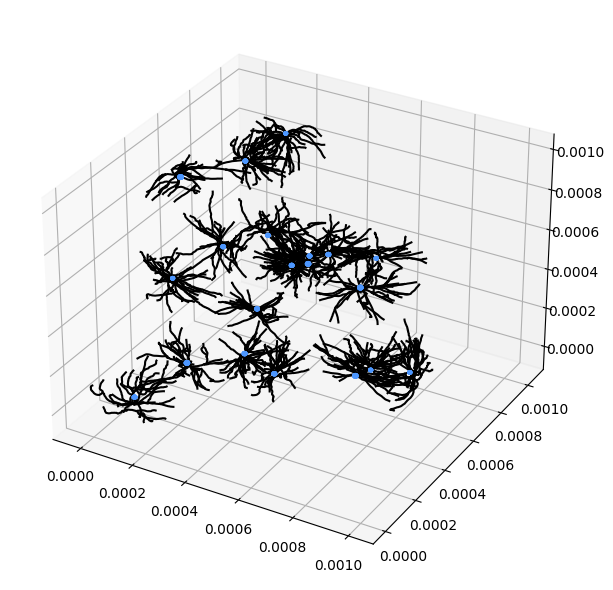

In [4]:
from snudda.plotting import PlotNetwork
network_file = os.path.join(network_path, "network-neuron-positions.hdf5")
pn = PlotNetwork(network_file)
pn.plot(plot_axon=False, plot_dendrite=True, plot_synapses=False)
pn.close() 